# Robot World 1-D

### Introduction
In the nanodegree, you are going to see robot probability distributions represented two different ways: 
* with discrete probability distributions
* and with continuous probability distributions

Discrete probability distributions are used when you track a robot's movement across a map divided into square grids. Each grid is a discrete location where the robot could be located.

In this exercise, you'll work with a probability distribution representing the uncertainty in a robot's location.


## Robot Initialization
Imagine you have a robot living in a 1-D world. The robot lives on a grid with nine different spaces. The robot can only move forwards or backwards. If the robot falls off the grid, it will loop back around to the other side.

The robot has a map so that it knows there are only nine spaces. But the robot does not know where it is on the map. Here is the 1-D map.

![1-D Robot World](1D_world.jpg "1-D Robot World")

When the robot first turns on, the probability that the robot is on any one of these spaces is 1/9; the implication is that the robot has an equal probability of being at any of the spaces on the grid.


# Exercise 1 - Initial Probability

Now, write a function that receives the number of spaces in the robot's world and then returns a list containing the initial probability for each space on the grid.

So in the example given so far, there would be a list with nine probabilities. And every value in the list would be 1/9. Remember, because the robot does not know where it is at first, the probability of being in any space is the same.

Python's list.append() method might be useful.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def initialize_robot(grid_size):
    
    grid = []
    for i in range(grid_size):
        grid.append(1/grid_size)
    
    # TODO: for each space on the map grid, store the initial probability
    # in the grid list. For example, if there are eight spaces on the grid,
    # the grid list should have eight entries where each entry represents
    # the initial probability of the robot being in that space.
    
    return grid

Run the cell below to make sure that your function outputs the correct results.

In [2]:
# Result should be a list with 9 elements all having value 1/9
assert initialize_robot(9) == [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]

# Result should be a list with 4 elements all having value 1/4
assert initialize_robot(4) == [1/4, 1/4, 1/4, 1/4]

print('Hooray! You just initialized a discrete probability distribution')

Hooray! You just initialized a discrete probability distribution


# Exercise 2 - Grid Probability

Now, write a function called `grid_probability` that outputs the probability that the robot is at a specific point on the grid. The input to this function will be:

* the output of the previous function (ie a list representing a 1-D map of probabilities)
* the grid number where you want to know the probability

So if you wanted to know the current probability that the robot is at the fifth tile on the grid, you would called the function like:

`grid_probability(my_grid, 4)`.

Why would the function input be 4 instead of 5? Think about how Python accesses values in a list. Typing `mylist[0]` gives you the first element in the list. Typing `mylist[1]` gives you the second element in the list.

In [3]:
def grid_probability(grid, position):
    
    ##### 
    # TODO: Use an if statement to make sure that the position input
    # does not go beyond the size of the list. Say the list has five elements
    # and your code tries to access grid[5] or grid[6]. That will lead to an 
    # error. 
    if position>=len(grid):
        print('out of boundary')
        return None
    # TODO: If the position input is legitimate, then return the probability
    # stored at that position. If the position input is not legitimate, then
    # return None
    #####
    
    return grid[position]


Run the cell below to test the results of your code. If the grid_probability function works as expected, the code cell should print out "Awesome work!".

In [4]:
assert grid_probability([.1, .1, .2, .1, .5], 2) == 0.2
    
assert grid_probability([.1, .1, .2, .1, .5], 7) == None

print('Awesome work!')

out of boundary
Awesome work!


# Exercise 3 - Visualize Robot World

Next, write a function that outputs a bar chart showing the probabilities of each grid space. 

Remember that we are working with a discrete probability distribution; the robot location can only take on certain values ie square 1, square 2, square 3, square 4, etc. 

The grid number would be on the x-axis. For a discrete probability distribution, the y-axis represents probability.

The input to the function is a list with the probability that the robot is at each point on the grid.

Your result should look something like this:

![Uniform Probability Distribution](uniform_prob.png "Uniform Probability Distribution")

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def output_map(grid):
    
    ###
    # TODO: Start by creating a list to represent the x-axis labels.
    # For example, if the grid variable has length 5, x_labels would contain
    # a list [0, 1, 2, 3, 4]. 
    #
    # HINT: Python's built in len() and range() functions might
    #       be useful. If you are not sure how to use these
    #       functions, look them up in a search engine.
    #       For example, in google, look up "Python len".
    ###
    
    x_labels = []
    x_labels=range(len(grid))
    ###
    # TODO: Using matplotlib, output a bar chart of the results.
    # Notice that we have already imported the matplotlib library
    # at the top of this code cell.
    
    # If you are unsure how to make a bar chart, go back to the 
    # "Plotting in Python demonstration" to see an example.
    
    # Make sure your plot has an xlabel, a ylabel, and a title
    # Don't forget that the last line needs to be plt.show() so
    # that your visualization prints out to the screen.
    
    plt.bar(x_labels,grid)
    plt.xlabel('grid space')
    plt.title('bar')
    plt.show()

Run the code cell below to see the results of your visualization. Your results should look something like this:

![Robot 1D Visualization](robot1D.png "1D Robot Visualization")

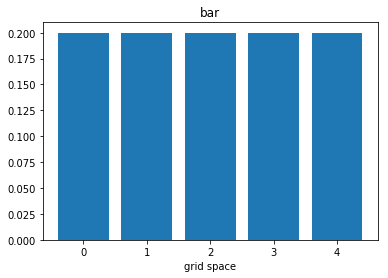

In [10]:
output_map([.2, .2, .2, .2, .2])

### Exercise 4 - Updating Probabilities

This final problem is meant to be the most challenging one. You'll have to think about how for loops and list indexing work.

As the robot moves around and senses its surroundings, it will update its belief about where it is on the map. You'll learn about this in the localization lesson that comes up next. 

#### Instructons

For now, write a function that updates the probabilities for each grid space. The function has these two inputs:

* a list containing the probabilities that the robot is at each spot on the map-grid
* a list of lists containing the new probabilities. Each element in the list has two entries: the first entry is a point on the map grid, and the second entry is the new probability.

#### Example Input and Output
Here is some example input:

The robot is initialized with a five-grid map, so the probabilities are in a list

* `robot_grid = [0.2, 0.2, 0.2, 0.2, 0.2]`

The robot figures out that it actually has a 0.4 probability of being at the first spot `robot_grid[0]` and 0.15 probability of being at all the other spots. So the second input looks like this

* `updates = [[4, 0.15], [0, .4], [3, 0.15], [1, 0.15], [2, 0.15]]`

Notice that this second input is not in the order of the map grid. The first value is for grid 5 (indexed as 4), then grid 1 (indexed as 0), then grid 2 (indexed as 3), etc. 

The updates variable could also look like this and not contain information about the entire grid:
* `updates = [3, 0.1], [4, 0.2]`

Therefore, think about how you can use the information in the updates variable to correctly change the values in the robot_grid.

The output of the function would be the updated list of probabilities:

* [0.4, 0.15, 0.15, 0.15, 0.15]

#### Hints

Juggling all of this information in your head might prove difficult. Consider taking out a pencil and paper to work through the problem.

In [7]:
def update_probabilities(grid, updates):
        
    ###
    # TODO: write a for loop that goes through the updates list 
    # and replaces the probabilities in the grid variable.
    #
    # Here are a few HINTS:
    #     You can change a value in the grid variable like this:
    #         grid[0] = .5  where the 0 represents the first grid space
    #
    #     To access values in a list of lists, you need two brackets.
    #     
    #     For example, say 
    #     updates = [[5, 0.15], [0, .4], [3, 0.15], [1, 0.15], [2, 0.15]]
    #
    #     updates[0] will give you access to the first element in the list,
    #        which  is [5, 0.15].
    #
    #     updates[0][0] gives you access to the first element of [5, 0.15]
    #        or in other words the value 5. updates[0][1] gives you access
    #        to the value 0.15.
    #    
    ###
    for update in updates:
        index=update[0]
        probabilitity=update[1]
        grid[index]=probabilitity
    
    return grid

Run the code cell below to test your updates_probabilities function

In [8]:
assert update_probabilities([0.2, 0.2, 0.2, 0.2, 0.2], [[0, .4], [1, 0.15], [2, 0.15], [3, 0.15], [4, 0.15]]) == [0.4, 0.15, 0.15, 0.15, 0.15]
assert update_probabilities([0.2, 0.2, 0.2, 0.2, 0.2], [[1, 0.15], [0, .4], [4, 0.15], [2, 0.15], [3, 0.15]]) == [0.4, 0.15, 0.15, 0.15, 0.15]
assert update_probabilities([0.2, 0.2, 0.2, 0.2, 0.2], [[0, .25], [4, 0.15]]) == [0.25, 0.2, 0.2, 0.2, 0.15]

print('Everything looks good!')

Everything looks good!
